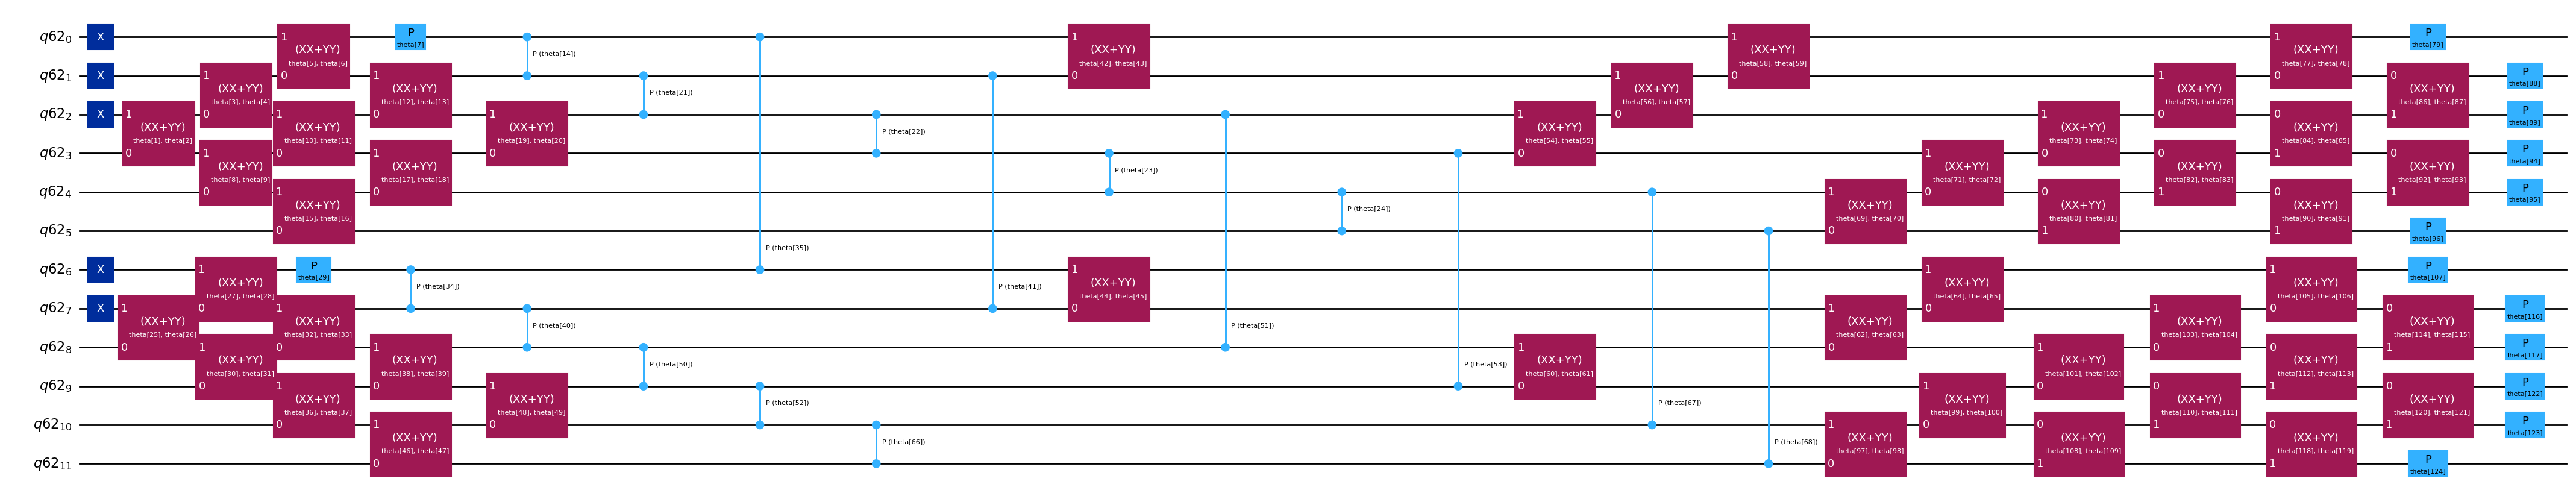

In [23]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_addon_aqc_tensor import parametrize_circuit
from ffsim.variational.util import interaction_pairs_spin_balanced

import ffsim


def ucj_spin_balanced_ansatz(
    norb: int,
    nelec: tuple[int, int],
    n_reps: int,
    interaction_pairs: tuple[
        list[tuple[int, int]] | None, list[tuple[int, int]] | None
    ],
) -> QuantumCircuit:
    ucj_op = ffsim.random.random_ucj_op_spin_balanced(
        norb,
        n_reps=n_reps,
        interaction_pairs=interaction_pairs,
    )
    qubits = QuantumRegister(2 * norb)
    circuit = QuantumCircuit(qubits)
    circuit.append(ffsim.qiskit.PrepareHartreeFockJW(norb, nelec), qubits)
    circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)
    circuit = ffsim.qiskit.PRE_INIT.run(circuit).decompose()
    ansatz, parameters = parametrize_circuit(circuit)
    return ansatz


norb = 6
nelec = (3, 2)
n_reps = 1
pairs_aa = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (0, 0)]
pairs_bb = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]
# interaction_pairs = interaction_pairs_spin_balanced("square", norb)
interaction_pairs = (pairs_aa, pairs_bb)
ansatz = ucj_spin_balanced_ansatz(norb, nelec, n_reps=n_reps, interaction_pairs=interaction_pairs)
ansatz.draw("mpl", fold = -1)

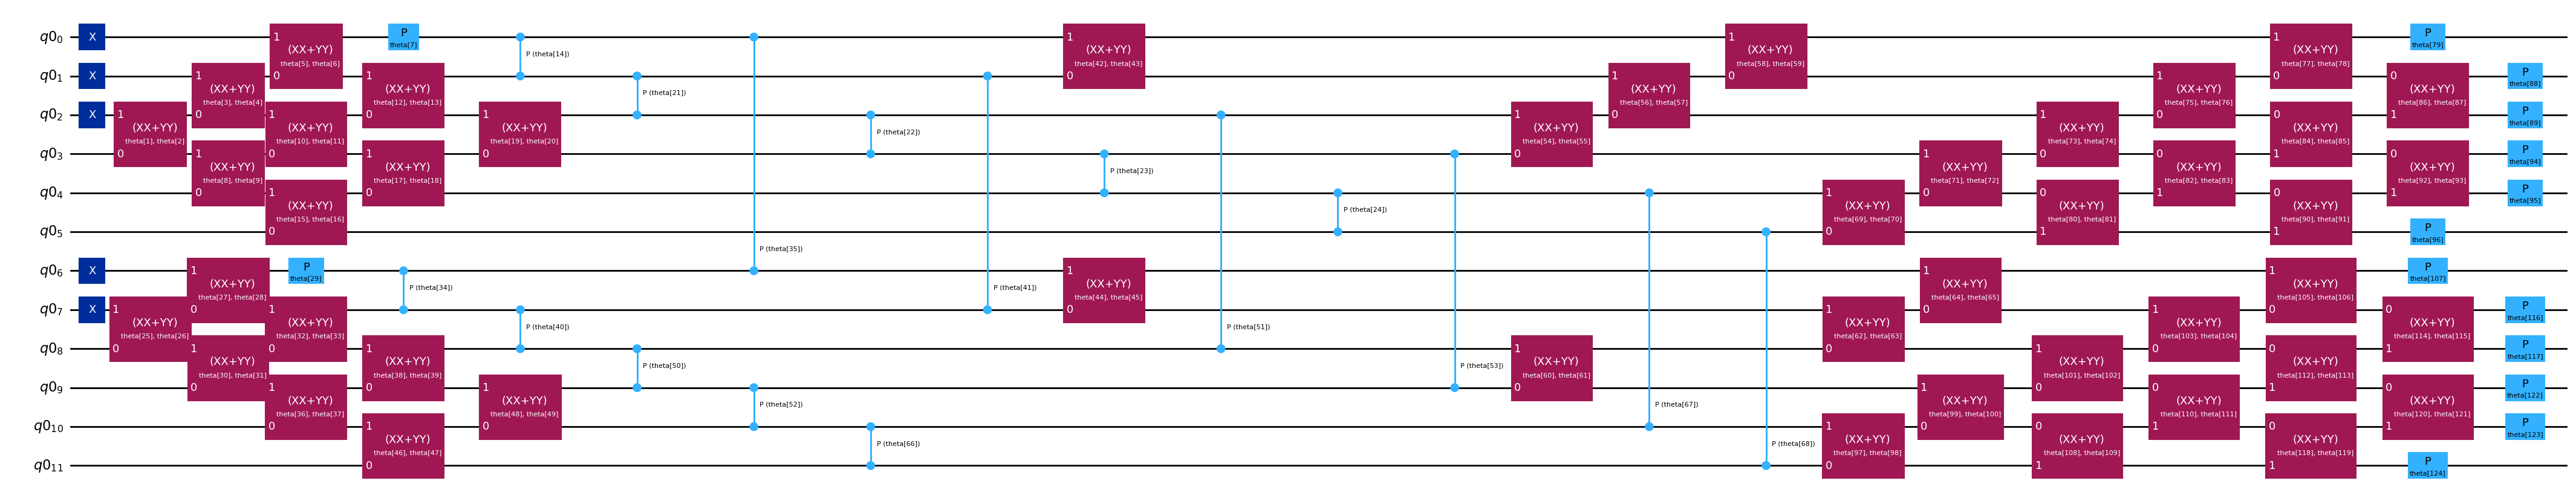

In [4]:
ansatz.draw("mpl", fold=-1)

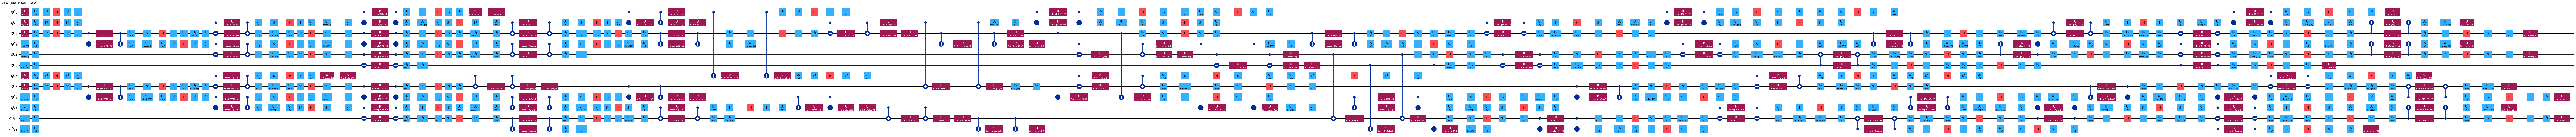

In [5]:
ansatz.decompose(reps=2).draw("mpl", fold=-1)